# Digit Recognition with Convolutional Neural Networks

Author:  Joshua Saffy

## Introduction:
Convolutional neural networks have become one of the cornerstone techneques for image recognition and natural language processing.  In this project I will apply a convolutional neural network to the MNIST data set using tensorflow and evaluate the results.  

In [49]:
from tensorflow import keras 
from keras.datasets import mnist
from keras import layers
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

First we will load the data and then plot the first few images to see our data. Each image in digit_train is a 28 by 28 array of greyscale color vales from 0 to 255.

In [50]:
(digit_train, digit_target_train) , (digit_test, digit_target_test) = mnist.load_data()

In [51]:
digit_train.shape

(60000, 28, 28)

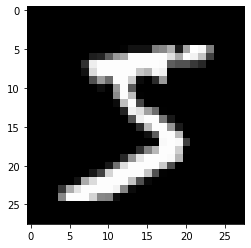

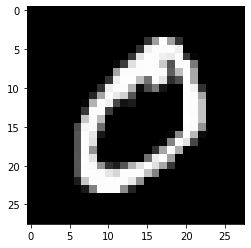

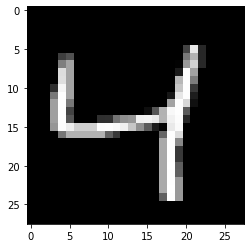

In [52]:
for image in range(0,3):
    plt.imshow(digit_train[image], cmap = plt.get_cmap('gray'))
    plt.show()

Before we define our model, we will need to do some data engineering.  Our target variable will be one hot encoded to a vector and we will have to reshape the image data.  

In [53]:
digit_train = np.reshape(digit_train, (60000,28,28,1))
digit_test = np.reshape(digit_test, (10000,28,28,1))

digit_train = digit_train.astype('float32')
digit_test = digit_test.astype('float32')

# rgb values are converted to be between 0 and 1
digit_train /= 255
digit_test /= 255

digit_target_train = keras.utils.to_categorical(digit_target_train)
digit_target_test = keras.utils.to_categorical(digit_target_test)


In [54]:
digit_model = keras.Sequential()
digit_model.add(layers.Conv2D(32, (3,3), kernel_initializer= 'he_uniform'))
digit_model.add(layers.MaxPooling2D((2,2)))
digit_model.add(layers.Flatten())
digit_model.add(layers.Dense(100, activation = 'relu', kernel_initializer="he_uniform"))
digit_model.add(layers.Dense(100, activation= 'relu', kernel_initializer= 'he_uniform'))
digit_model.add(layers.Dense(10, activation= 'softmax'))
digit_model.compile(optimizer = 'SGD', loss='categorical_crossentropy', metrics=['accuracy'])


In [55]:
digit_model.fit(digit_train, digit_target_train)

1875/1875 [==============================] - 16s 8ms/step - loss: 0.2602 - accuracy: 0.9237


In [56]:
predictions = digit_model.predict(digit_test)

In [57]:
transformed_predictions = []

for prediction in predictions:
    max_index = np.argmax(prediction)
    transformed_predictions.append(max_index)

predictions = np.array(transformed_predictions)
predictions[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

In [58]:
digit_target_test[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [59]:
transformed_test = []

for test in digit_target_test:
    max_index = np.argmax(test)
    transformed_test.append(max_index)

digit_target_test = np.array(transformed_test)

In [60]:
confusion_matrix = metrics.confusion_matrix(digit_target_test, predictions)

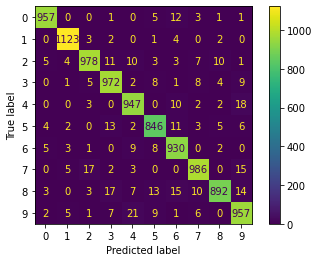

In [61]:
metrics.ConfusionMatrixDisplay(confusion_matrix).plot()
plt.show()


In [62]:
accuracy = metrics.accuracy_score(digit_target_test, predictions)
accuracy

0.9588

7


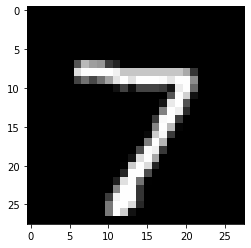

2


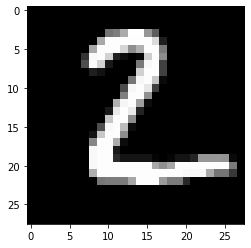

1


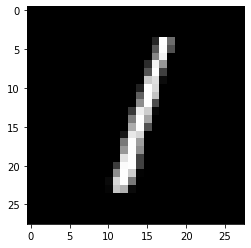

0


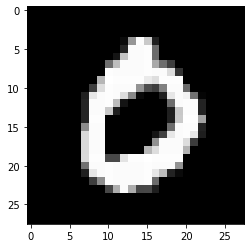

4


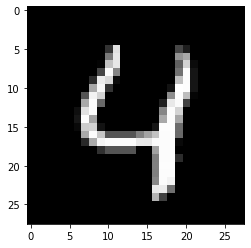

1


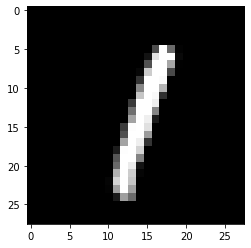

4


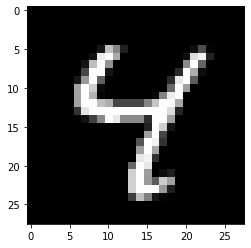

9


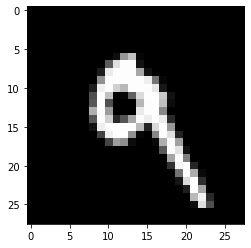

6


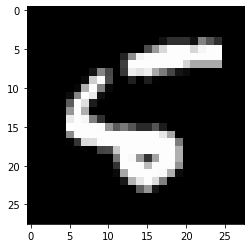

9


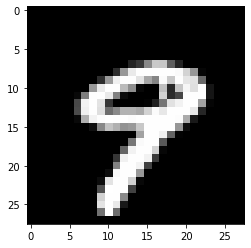

0


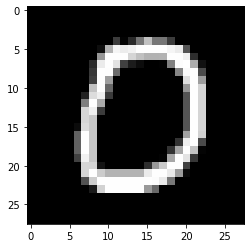

6


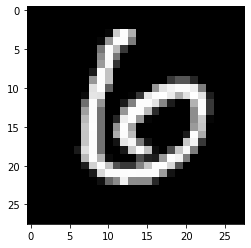

9


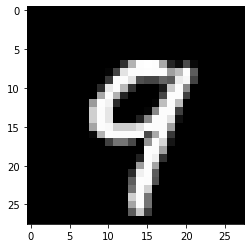

0


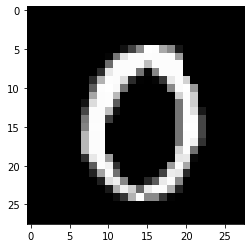

1


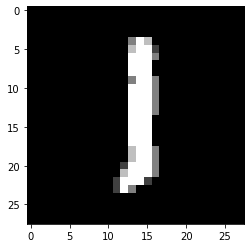

5


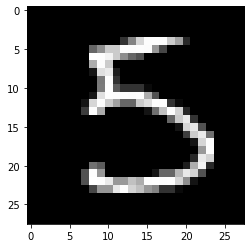

9


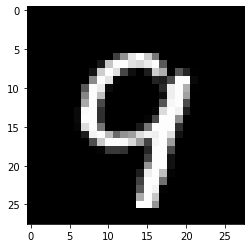

7


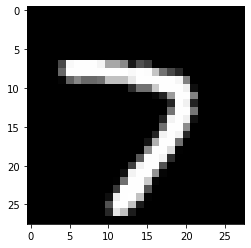

3


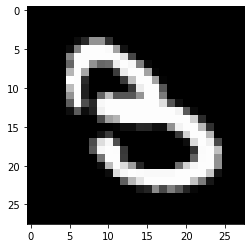

4


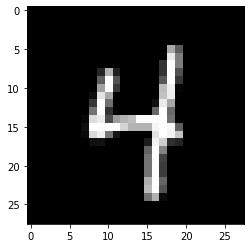

9


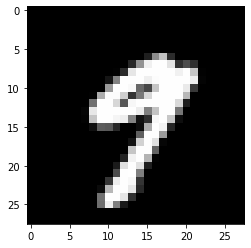

6


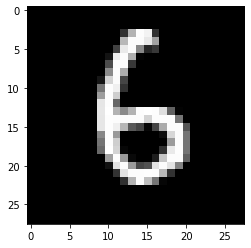

6


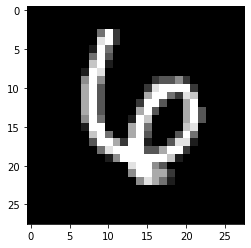

5


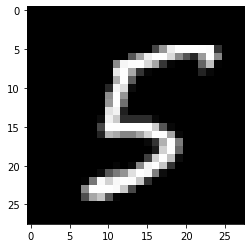

4


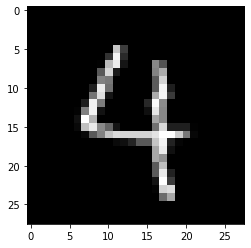

0


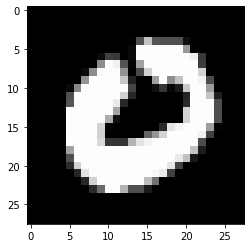

7


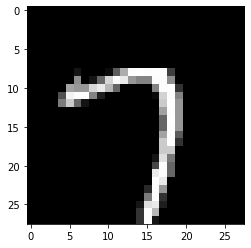

4


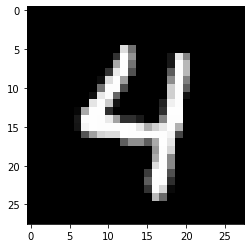

0


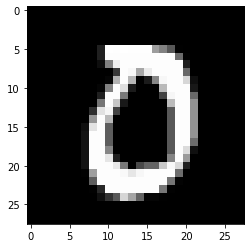

1


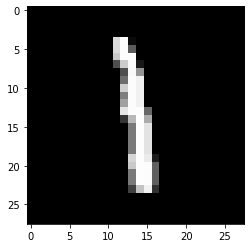

3


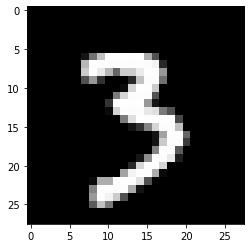

1


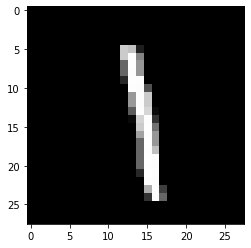

3


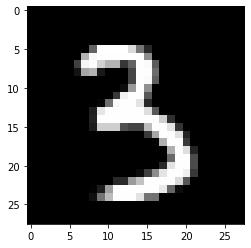

4


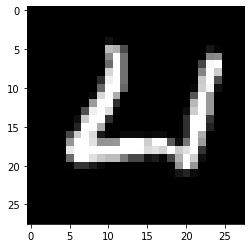

7


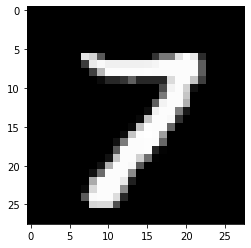

2


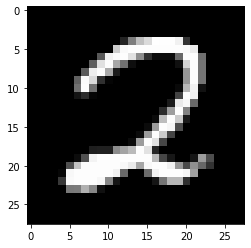

7


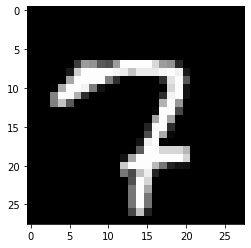

1


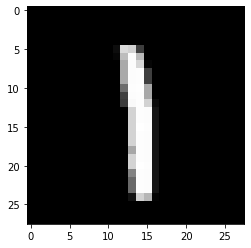

2


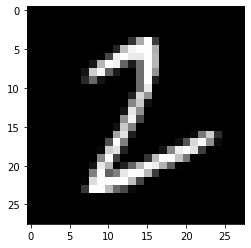

1


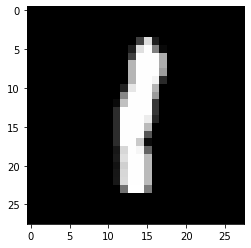

1


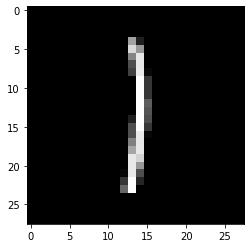

7


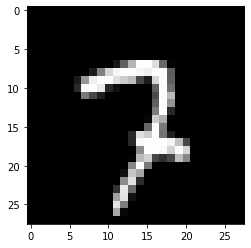

4


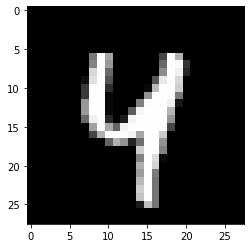

2


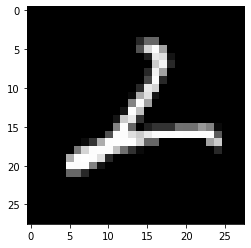

3


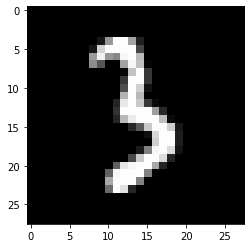

5


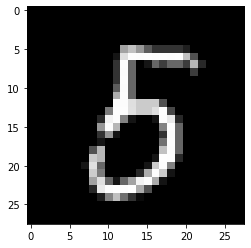

1


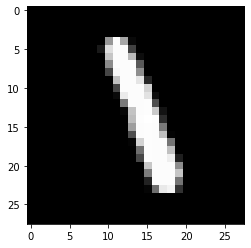

2


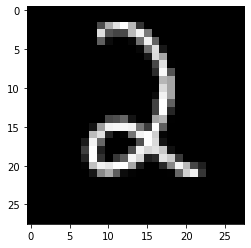

4


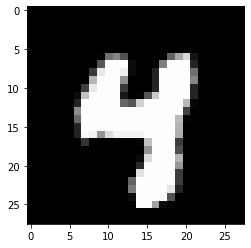

4


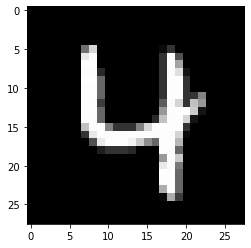

In [65]:
for image in range(0,50):
    print(predictions[image])
    plt.imshow(digit_test[image], cmap = plt.get_cmap('gray'))
    plt.show()